### Setup

In [114]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None, 'display.max_rows', 100) 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import missingno as msno

import scipy.stats as st

from os import path
import pickle

### Load Data

In [115]:
f = 'loan_clean.p'
d = ['..','data','interim']
fp = path.join(*d,f)

with open(fp, 'rb') as file:
    data = pickle.load(file)

In [3]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default,default_harsh,had_delinq,had_major_derog,had_record,annual_inc_merged,dti_merged,rev_util_custom,rev_lim_custom,tot_cur_bal_filled,tot_cur_bal_med,had_collections,verification_status_merged,earliest_cr_line_td
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,0,0,0,24000.0,27.65,16305.854241,16305.854241,15008.0,15008.0,0,Verified,-9830
1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,1,0,0,0,30000.0,1.00,17946.808511,17946.808511,24713.0,24713.0,0,Source Verified,-4627
1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,0,0,0,12252.0,8.72,3001.015228,3001.015228,15008.0,15008.0,0,Not Verified,-3682
1076863,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,917xx,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,1,0,0,49200.0,20.00,26657.142857,26657.142857,49042.0,49042.0,0,Source Verified,-5782
1075269,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,852xx,AZ,11.20,0.0,2004-11-01,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,0,0,0,36000.0,11.20,28137.809187,28137.809187,30048.0,30048.0,0,Source Verified,-2586


In [4]:
data.shape

(270858, 58)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270858 entries, 1077501 to 36260758
Data columns (total 58 columns):
loan_amnt                     270858 non-null float64
funded_amnt                   270858 non-null float64
funded_amnt_inv               270858 non-null float64
term                          270858 non-null object
int_rate                      270858 non-null float64
installment                   270858 non-null float64
grade                         270858 non-null object
sub_grade                     270858 non-null object
emp_length                    270858 non-null object
home_ownership                270858 non-null object
annual_inc                    270858 non-null float64
verification_status           270858 non-null object
issue_d                       270858 non-null datetime64[ns]
loan_status                   270858 non-null object
pymnt_plan                    270858 non-null object
purpose                       270858 non-null object
zip_code           

In [6]:
data.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      222
total_acc                         0
initial_list_status         

### Exploring Loan Status

For the purposes of classification, the loan status is the target attribute. Specifically, we are interested in those loans that are default vs. fully paid. Taking a quick look at the distribution of loans across the various loan statuses:

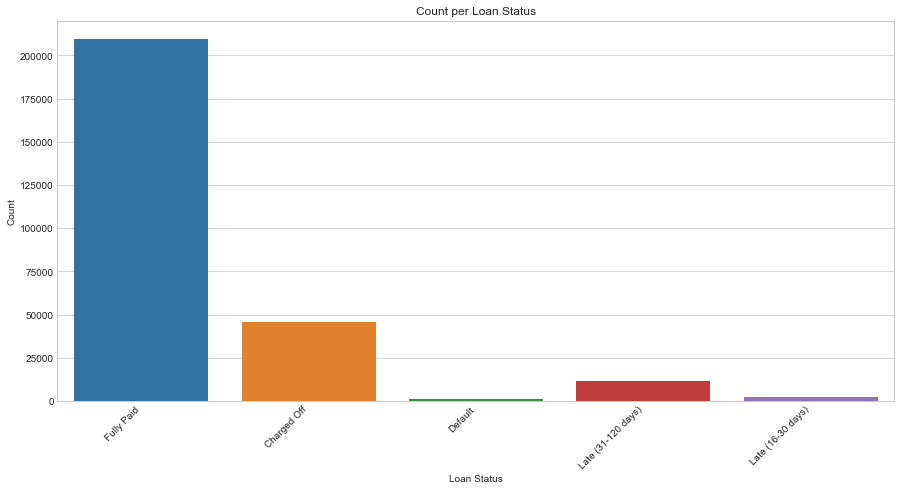

In [7]:
plt.figure(figsize=(15,7))

ax = sns.countplot(data['loan_status'])

plt.title('Count per Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

for l in ax.get_xticklabels():
    l.set_rotation(45)
    l.set_horizontalalignment('right')
    
plt.show()

In accordance with Lending Club's definitions of charged off vs. default, it is safe to group these two into a single category of "default". This is accomplished via the 'default' column which was added during initial cleaning.

Note that the various forms of "Current" loans have already been discarded during data cleaning, since this analysis is only valid for loans that have already reached a state of completion. However, this still leaves us with the two "Late..." statuses. These late status loans will either have to be discarded or combined into the default category. Comparing these two options:

In [8]:
# Mask for loans with Late status
late_mask = data['loan_status'].str.contains('Late')
late_mask.sum()

13948

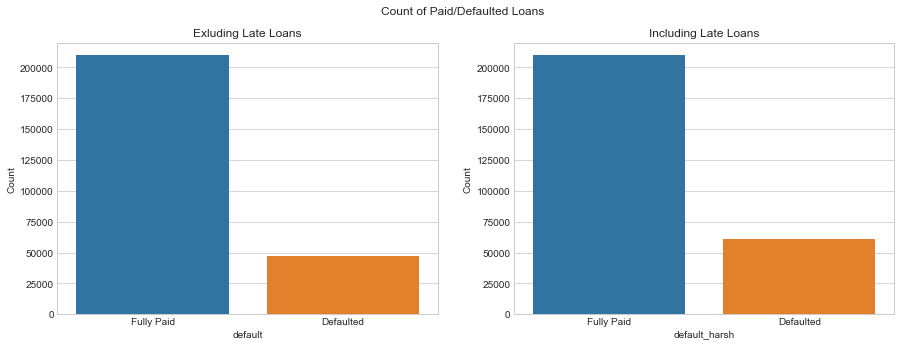

In [9]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.countplot(data[~late_mask]['default'], ax=axs[0])
axs[0].set_title('Exluding Late Loans')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(['Fully Paid', 'Defaulted'])


sns.countplot(data['default_harsh'], ax=axs[1])
axs[1].set_title('Including Late Loans')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(['Fully Paid', 'Defaulted'])

plt.suptitle('Count of Paid/Defaulted Loans')

plt.show()

In [10]:
p_exc_late = data[~late_mask]['default'].sum() / data[~late_mask].shape[0]
p_inc_late = data['default_harsh'].sum() / data.shape[0]

print('% Default Loans (w/o Late Loans) = {:.1f}'.format(100*p_exc_late))
print('% Default Loans (w/ Late Loans) = {:.1f}'.format(100*p_inc_late))

% Default Loans (w/o Late Loans) = 18.4
% Default Loans (w/ Late Loans) = 22.6


Defaulted loans are clearly in the minority. Adding late loans boosts the proportion by about 4%, but it is important to consider that it is a very unforgiving classification of defaulted loans. The questions becomes whether it is worth introducing possible false positive default loans for the addition of more data and perhaps more certainty in identifying non-default loans (true negatives). Whilst the initial problem may be framed in an approach of identifying defaults loans, considering the business context of identifying the "safest" loans for investment versus simply those to avoid, the latter approach may be more desireable.

In [91]:
late_mask = data['loan_status'].str.contains('Late')
data[~late_mask].corr()['default'].sort_values(ascending=False)

default                    1.000000
default_harsh              1.000000
recoveries                 0.445830
collection_recovery_fee    0.305026
int_rate                   0.239579
total_rec_late_fee         0.148128
out_prncp                  0.121891
out_prncp_inv              0.121889
dti_merged                 0.112232
dti                        0.112217
revol_util                 0.096587
inq_last_6mths             0.062153
loan_amnt                  0.056586
funded_amnt                0.056390
funded_amnt_inv            0.053137
total_rec_int              0.045047
installment                0.042536
earliest_cr_line_td        0.024753
delinq_2yrs                0.017466
open_acc                   0.010617
had_collections            0.009112
had_major_derog            0.007335
acc_now_delinq             0.006041
pub_rec                    0.003506
had_delinq                 0.003490
had_record                 0.001743
tot_coll_amt              -0.001607
revol_bal                 -0

In [92]:
grade_dict = {c: i for i, c in enumerate('ABCDEFG')}

In [99]:
subgrade_dict = {sg: grade_dict[sg[0]]*10 + int(sg[1]) for i, sg in enumerate([c + str(d) for d in range(1,6) for c in 'ABCDEFG'])}

In [100]:
temp_data = data.copy()
temp_data['grade_value'] = temp_data['grade'].map(grade_dict)
temp_data['subgrade_value'] = temp_data['sub_grade'].map(subgrade_dict)

In [101]:
late_mask = temp_data['loan_status'].str.contains('Late')
temp_data[~late_mask].corr()['default'].sort_values(ascending=False)

default_harsh              1.000000
default                    1.000000
recoveries                 0.445830
collection_recovery_fee    0.305026
int_rate                   0.239579
subgrade_value             0.233133
grade_value                0.229195
total_rec_late_fee         0.148128
out_prncp                  0.121891
out_prncp_inv              0.121889
dti_merged                 0.112232
dti                        0.112217
revol_util                 0.096587
inq_last_6mths             0.062153
loan_amnt                  0.056586
funded_amnt                0.056390
funded_amnt_inv            0.053137
total_rec_int              0.045047
installment                0.042536
earliest_cr_line_td        0.024753
delinq_2yrs                0.017466
open_acc                   0.010617
had_collections            0.009112
had_major_derog            0.007335
acc_now_delinq             0.006041
pub_rec                    0.003506
had_delinq                 0.003490
had_record                 0

### Exploring Annual Income

Whilst not the most signficant feature in terms of correlation with default status, one of the basic factors when applying for and evaluating credit is the applicants income, so we will begin with exploring this attribute. During data cleaning, a new column was created ('annual_inc_merged') to combine the values of individual and joint applications, and will focus on this value versus the plain 'annual_inc' during analysis. The justification behind this decision is that joint borrowers should be represented by the joint properties versus those of one of the individuals, since all members are liable and capable of contributing to the payment of the loan.

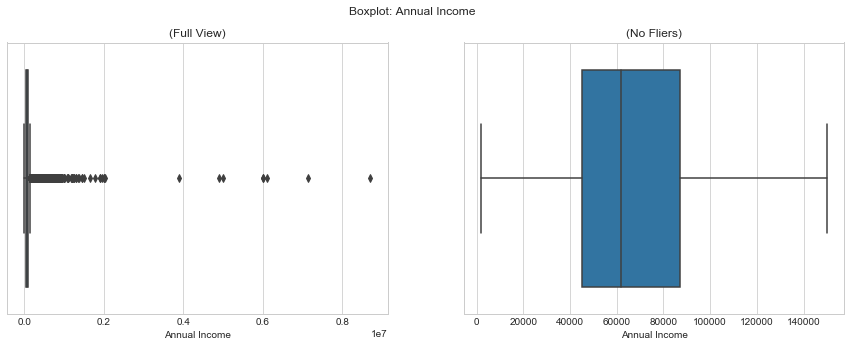

In [11]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(data['annual_inc_merged'], ax=axs[0])
sns.boxplot(data['annual_inc_merged'], showfliers=False, ax=axs[1])

plt.suptitle('Boxplot: Annual Income')
axs[0].set_title('(Full View)')
axs[0].set_xlabel('Annual Income')
axs[1].set_title('(No Fliers)')
axs[1].set_xlabel('Annual Income')

plt.show()

Repeating this view with a distribution plot:

In [12]:
# Get incomes below 95th percentile to filter out extreme values
inc_mask = data['annual_inc_merged'] < data['annual_inc'].quantile(0.95)

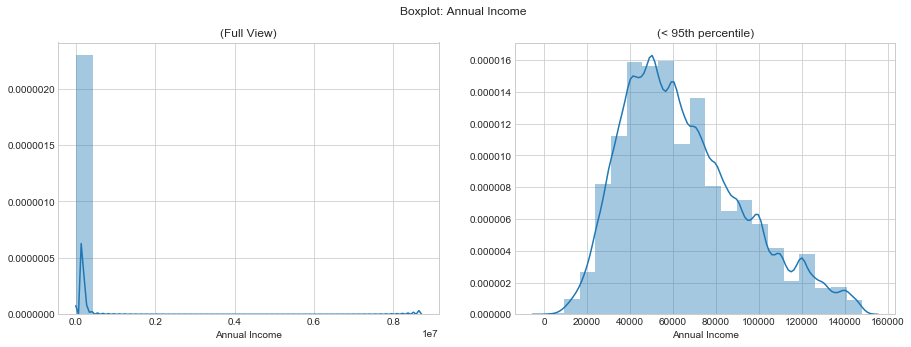

In [13]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

n_bins = 20

sns.distplot(data['annual_inc_merged'], ax=axs[0], bins=n_bins)
sns.distplot(data[inc_mask]['annual_inc_merged'], ax=axs[1], bins=n_bins)

plt.suptitle('Boxplot: Annual Income')
axs[0].set_title('(Full View)')
axs[0].set_xlabel('Annual Income')
axs[1].set_title('(< 95th percentile)')
axs[1].set_xlabel('Annual Income')

plt.show()

In [14]:
inc_skew = st.skew(data['annual_inc_merged'])
inc_kurt = st.kurtosis(data['annual_inc_merged'])

print('Annual Income (All): Skew = {:.2f}, Kurtosis = {:.2f}'.format(inc_skew, inc_kurt))

Annual Income (All): Skew = 39.42, Kurtosis = 4260.84


In [15]:
inc_skew = st.skew(data[inc_mask]['annual_inc_merged'])
inc_kurt = st.kurtosis(data[inc_mask]['annual_inc_merged'])

print('Annual Income (< 95th percentile): Skew = {:.2f}, Kurtosis = {:.2f}'.format(inc_skew, inc_kurt))

Annual Income (< 95th percentile): Skew = 0.66, Kurtosis = -0.09


From the above results, we can see that without removing the high-end incomes, the distribution has both an extreme skew and kurtosis. Removing all incomes above the 95th percentile yields much cleaner results, albeit still with a moderate skew. If we want to keep these higher incomes for analysis, binning via regular intervals is unlikely to yield useful results due to the sparsity of data in the higher income ranges. However, binning via quantiles should yield a more uniform distribution of income categories:

In [16]:
def get_qbin(val, quartiles):
    '''
    Return which of the provided quartiles the value falls in.
    '''
    for i, q in enumerate(quartiles):
        if val <= q:
            return i+1

In [17]:
q = 0.1
q_range = np.arange(q, 1+q, q)
quantiles = data['annual_inc_merged'].quantile(q_range)
income_q10 = data['annual_inc_merged'].apply(lambda x: get_qbin(x, quantiles))

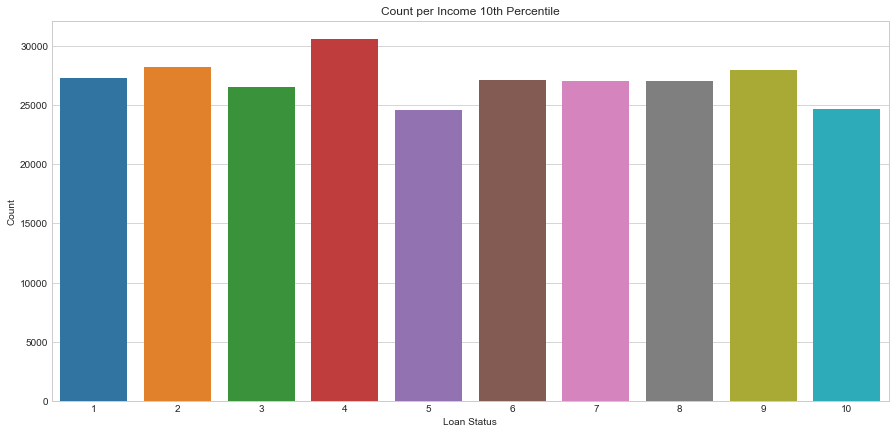

In [18]:
plt.figure(figsize=(15,7))

ax = sns.countplot(income_q10)

plt.title('Count per Income 10th Percentile')
plt.xlabel('Loan Status')
plt.ylabel('Count')
    
plt.show()

In [19]:
q = 0.05
q_range = np.arange(q, 1+q, q)
quantiles = data['annual_inc_merged'].quantile(q_range)
income_q5 = data['annual_inc_merged'].apply(lambda x: get_qbin(x, quantiles))

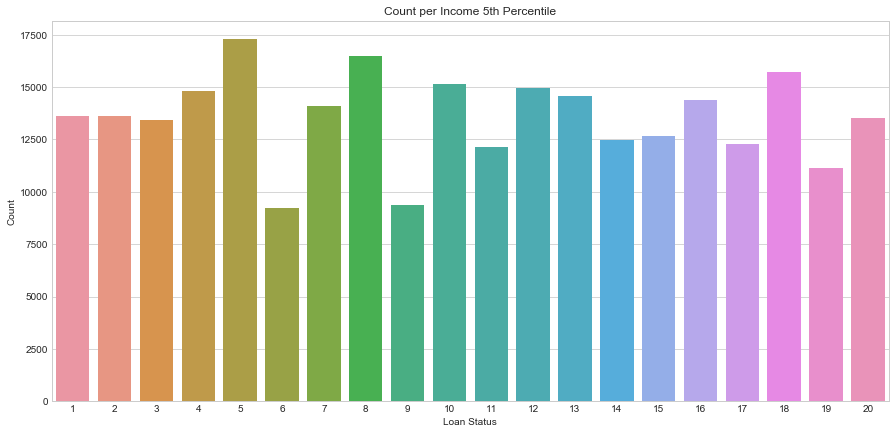

In [20]:
plt.figure(figsize=(15,7))

ax = sns.countplot(income_q5)

plt.title('Count per Income 5th Percentile')
plt.xlabel('Loan Status')
plt.ylabel('Count')
    
plt.show()

Splitting data into 10th percentiles seems to yield a relatively uniform distribution between categories, whilst the 5th percentile split may be a little excessive. Using this categorization of income may prove useful, and should be considered for modelling versus the original income value.

Finally, comparing the income data across the target variable:

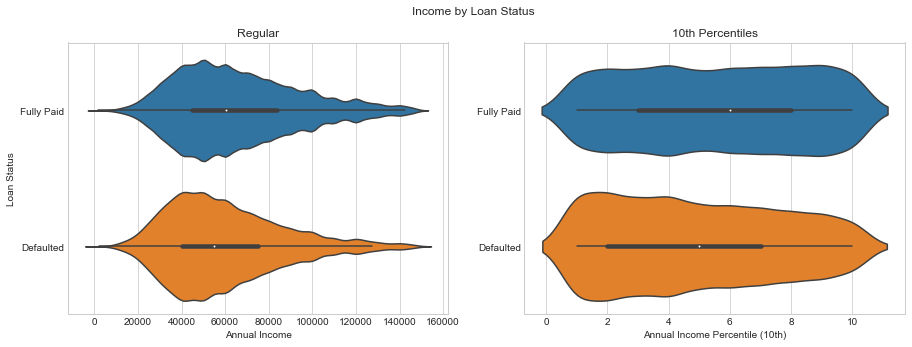

In [21]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.violinplot(y=data[inc_mask]['default'], x=data[inc_mask]['annual_inc_merged'], ax=axs[0], orient='h')
axs[0].set_title('Regular')
axs[0].set_xlabel('Annual Income')
axs[0].set_ylabel('Loan Status')
axs[0].set_yticklabels(['Fully Paid', 'Defaulted'])

sns.violinplot(y=data['default'], x=income_q10, bw=0.2, ax=axs[1], orient='h')
axs[1].set_title('10th Percentiles')
axs[1].set_xlabel('Annual Income Percentile (10th)')
axs[1].set_ylabel('')
axs[1].set_yticklabels(['Fully Paid', 'Defaulted'])

plt.suptitle('Income by Loan Status')

plt.show()

Whilst the impact may not be as profound as expected, one can at least note that the lower percentile income brackets show a slightly larger proportion of defaulted loans.

### Exploring Loan Amount

For loan amount, there are three values to explore: 'loan_amnt', 'fundend_amnt', and 'funded_amnt_inv'.

To start, we will take a basic look at how the overall requested loan amount compares to the annual income of applicants:

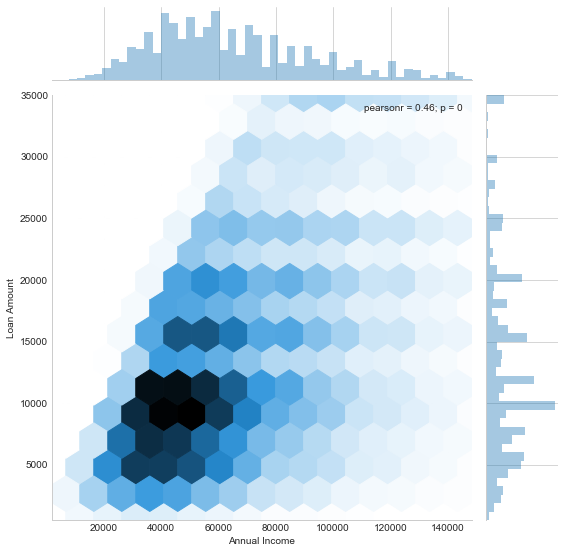

In [22]:
sns.jointplot(data[inc_mask]['annual_inc_merged'], data[inc_mask]['loan_amnt'], kind='hex', gridsize=15)

fig = plt.gcf()
fig.set_size_inches(8,8)
fig.axes[0].set_xlabel('Annual Income')
fig.axes[0].set_ylabel('Loan Amount')

plt.show()

In [23]:
# Max loan amount for ALL loans, including income outliers
print('Max Loan Amount on Record = {:.2f}'.format(data.loan_amnt.max()))

Max Loan Amount on Record = 35000.00


Two things are immediately evident from the figure above:
1. There is a clear cutoff on the loan amounts possible at $35,000 - even including those that were exluded in the high-income outliers. This is likely a cap set by Lending Club, at least for this set of publicly available loans for individual investors.
2. There is a significant cutoff trend for the loan amounts based off income. Roughly, loan amounts seem to rarely exceed 0.5 (half) of an applicant annual income.

Exploring observation #2 a little further:

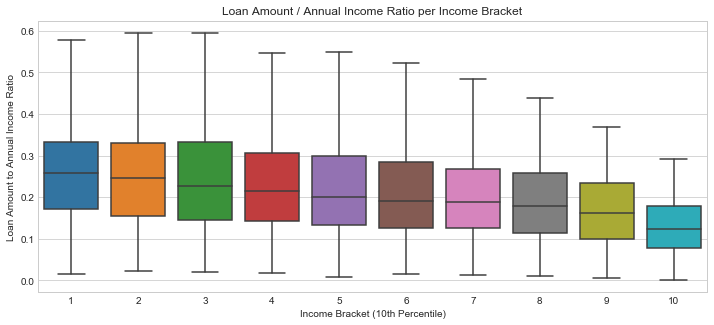

In [24]:
plt.figure(figsize=(12,5))

sns.boxplot(income_q10, data['loan_amnt']/data['annual_inc_merged'], showfliers=False)

plt.title('Loan Amount / Annual Income Ratio per Income Bracket')
plt.xlabel('Income Bracket (10th Percentile)')
plt.ylabel('Loan Amount to Annual Income Ratio')

plt.show()

In [25]:
n = (data['loan_amnt'] >= 0.5*data['annual_inc_merged']).sum()
p = n / data.shape[0]

print('# Records w/ Loan Amount > 0.5 * Annual Income = {:d} ({:.1f}%)'.format(n, 100*p))

# Records w/ Loan Amount > 0.5 * Annual Income = 1193 (0.4%)


Whilst there are a few loans with amounts greater than this approx. 0.5 ratio, it only amounts to 0.4% of the data. As for the downard trend in the loan amount to annual income ratio, this is likely a result of the $35,000 cap on loan amount, which exists regardless of income.

Moving on to the funded amounts, 

In [26]:
# Percentage with equal loan and funded amounts
((data['loan_amnt'] == data['funded_amnt'])).mean()

0.99292249075161154

In [27]:
# Percentage with equal loan and invested amounts
((data['loan_amnt'] == data['funded_amnt_inv'])).mean()

0.8222020394450229

In [28]:
# Summary of difference between loan and invested amount
mask = data['loan_amnt'] != data['funded_amnt_inv']
(data[mask]['loan_amnt'] - data[mask]['funded_amnt_inv']).describe()

count    48158.000000
mean       862.210299
std       2570.283054
min          0.030000
25%         25.000000
50%         50.000000
75%        250.000000
max      32474.996081
dtype: float64

In [29]:
# Check for reoccuring values beyond 25 and 50
(data[mask]['loan_amnt'] - data[mask]['funded_amnt_inv']).value_counts().head(20)

25.0      13384
50.0      10778
250.0      3151
100.0      2595
75.0       2542
125.0       957
150.0       614
500.0       553
275.0       531
175.0       342
200.0       332
300.0       311
225.0       215
525.0       162
325.0       115
1000.0       87
350.0        86
550.0        84
375.0        72
7500.0       67
dtype: int64

In addition to the majority of records having idential loan and funded amounts, those that are recurring seem to be mostly \$25 or \$50. It may still be worth noting some of the considerable differences between the requested and invested amount for modeling, but there are only going to be a little over a thousand or so records that actually show a signficiant difference (i.e. \$500+).

### Evaluating Grade

Assuming Lending Club's assessments are reasonable, one would anticipate a significnat impact from application grade and subgrade on the rate of default loans. To start, we will take a look at the distribution of loans & defaults for each grade:

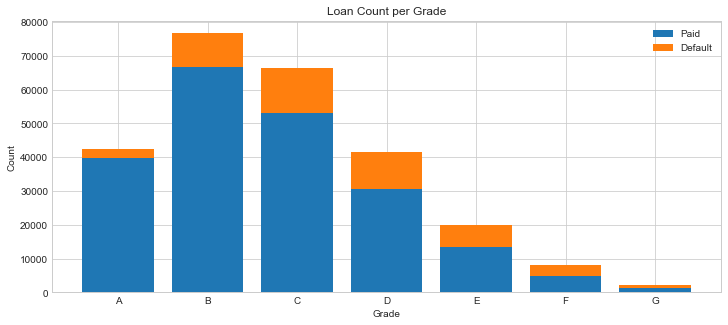

In [30]:
plt.figure(figsize=(12,5))

# Remove late records
temp_data = data[~data['loan_status'].str.contains('Late')]

# Sort data by Grade and proper bar chart labels
grades = list('ABCDEFG')
grades_mapping = {grade: i for i, grade in enumerate(grades)}
grades_key = temp_data['grade'].map(grades_mapping)
temp_data = temp_data.iloc[grades_key.argsort()]

# Get indeces and bar chart data
ind = list(range(len(grades)))
count_paid = temp_data[temp_data['default'] == 0].groupby('grade').size()
count_default = temp_data[temp_data['default'] == 1].groupby('grade').size()

# Plot stacked bars for paid and default loans
plt.bar(ind, count_paid, label='Paid')
plt.bar(ind, count_default, bottom=count_paid, label='Default')

plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Loan Count per Grade')
plt.xticks(ind, grades)
plt.legend()

plt.show()

The figure above shows that the majority of loans listed fall within the A through D grade range. However, it is a bit difficult to discern the proprotion of defaults in each grade category, so we will look at the default rate for each:

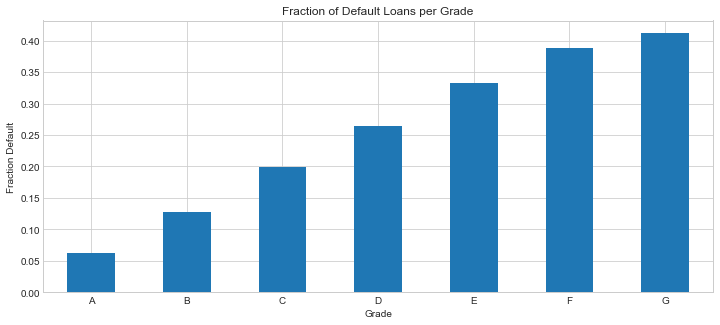

In [31]:
plt.figure(figsize=(12,5))

temp_data.groupby('grade')['default'].mean().plot.bar(rot=0)

plt.xlabel('Grade')
plt.ylabel('Fraction Default')
plt.title('Fraction of Default Loans per Grade')

plt.show()

This clearly shows that the lower grade ratings have a much higher chance of defaulting, but it is worth noting that a little over 5% of even the A rated loans default. Comparing to the overall default rate of about 18%, one can also note that the grades D and below are where we begin to observe defaults at a higher rate.

Repeating this analysis at the more granular subgrade:

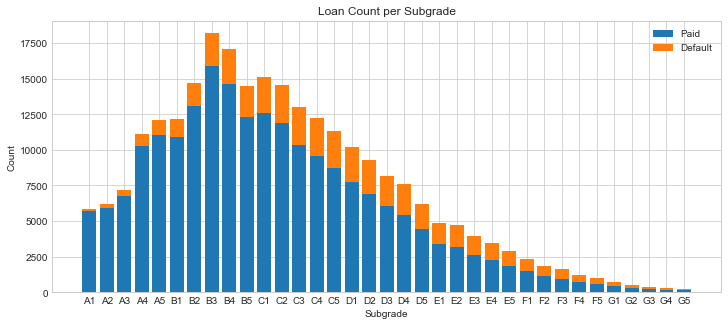

In [32]:
plt.figure(figsize=(12,5))

temp_data = data[~data['loan_status'].str.contains('Late')]

subgrades = [c + str(i) for c in grades for i in range(1,6) ]
subgrades_mapping = {grade: i for i, grade in enumerate(subgrades)}
subgrades_key = temp_data['sub_grade'].map(subgrades_mapping)
temp_data = temp_data.iloc[subgrades_key.argsort()]

ind = list(range(len(subgrades)))
count_paid = temp_data[temp_data['default'] == 0].groupby('sub_grade').size()
count_default = temp_data[temp_data['default'] == 1].groupby('sub_grade').size()

plt.bar(ind, count_paid, label='Paid')
plt.bar(ind, count_default, bottom=count_paid, label='Default')

plt.xlabel('Subgrade')
plt.ylabel('Count')
plt.title('Loan Count per Subgrade')
plt.xticks(ind, subgrades)
plt.legend()

plt.show()

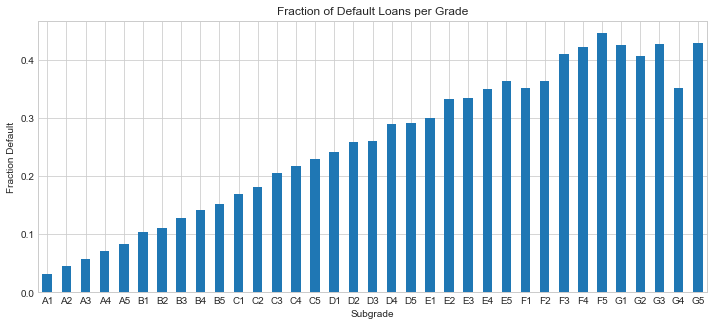

In [33]:
plt.figure(figsize=(12,5))

temp_data.groupby('sub_grade')['default'].mean().plot.bar(rot=0)

plt.xlabel('Subgrade')
plt.ylabel('Fraction Default')
plt.title('Fraction of Default Loans per Grade')

plt.show()

Again, we can observe a clear upward trend in the default rate with decreasing grade. It is worth noting that the G subgrades seem to taper off from this trend and show more variation between grade sub levels. However, this may be a result of G loans having a much more limited set of data in comparison with the other grades.

Listed on Lending Club's website is a set of interest rates for each grade/subgrade level. Higher risk loans (i.e. lower grade) have higher interest rates, so we will see if this expected correlation proves true and if there is consistency in the interest rate for a given grade/subgrade:

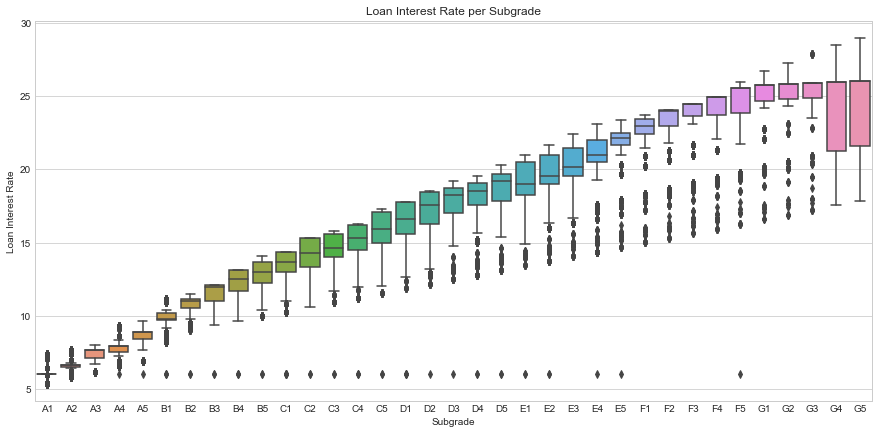

In [34]:
plt.figure(figsize=(15,7))

temp_data = data[~data['loan_status'].str.contains('Late')]

subgrades = [c + str(i) for c in grades for i in range(1,6) ]
subgrades_mapping = {grade: i for i, grade in enumerate(subgrades)}
subgrades_key = temp_data['sub_grade'].map(subgrades_mapping)
temp_data = temp_data.iloc[subgrades_key.argsort()]

sns.boxplot(temp_data['sub_grade'], temp_data['int_rate'])

plt.title('Loan Interest Rate per Subgrade')
plt.xlabel('Subgrade')
plt.ylabel('Loan Interest Rate')

plt.show()

Surprisingly there is actually a fair amount of variaton in interest rate at each loan subgrade. The upward trend in interest rate with decreasing loan grades is still evident, but there are are a number of lower interest exceptions the lower the grade. Not only does this indicate that there are other likely influencers on the interest rate selected (e.g. loan amount), but there could also be a difference in interest rate based off the year the loan was issued.

One would presume the debt to income (DTI) ratio to be one of the key influencers in assigning loan grades. A higher DTI would likely be considered higher risk, since unexpected changes in income would have a greater impact on a borrowers ability to pay all existing debt. Evaluating the distribution of DTI across each grade yields the following:

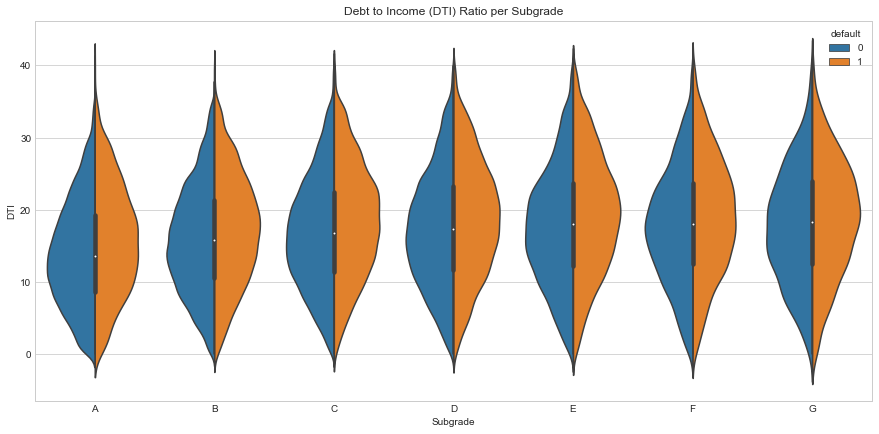

In [35]:
plt.figure(figsize=(15,7))

temp_data = data[~data['loan_status'].str.contains('Late')]

grades = list('ABCDEFG')
grades_mapping = {grade: i for i, grade in enumerate(grades)}
grades_key = temp_data['grade'].map(grades_mapping)
temp_data = temp_data.iloc[grades_key.argsort()]

sns.violinplot(temp_data['grade'], temp_data['dti_merged'], hue=temp_data['default'], split=True)

plt.title('Debt to Income (DTI) Ratio per Subgrade')
plt.xlabel('Subgrade')
plt.ylabel('DTI')

plt.show()

Surprisingly, while there is a gradual shift upward in the distribution of DTI with decreasing grade at first glance it does not appear to be quite as drastic as one might expect - all grades share a similar range in DTI. There is, however, a notable difference in DTI distribution at each grade between loans that defaulted and those that did not: those that defaulted are more likely to have a higher DTI, suggesting that this may be a useful feature for our modelling.

To give some numerical context to the figure above:

In [55]:
data[~data['loan_status'].str.contains('Late')].groupby(['grade', 'default'])['dti'].describe()

count       mean       std  min      25%     50%      75%  \
grade default                                                                
A     0        39759.0  14.015754  7.295048  0.0   8.4700  13.530  19.1200   
      1         2671.0  15.874115  7.628947  0.0  10.1400  15.640  21.3500   
B     0        66806.0  15.929606  7.454816  0.0  10.3700  15.560  21.1500   
      1         9801.0  17.335707  7.634469  0.0  11.6900  17.310  22.9200   
C     0        53153.0  16.762301  7.678011  0.0  11.1000  16.420  22.0600   
      1        13150.0  18.533308  7.807768  0.0  12.8100  18.470  24.0700   
D     0        30514.0  17.252816  7.960009  0.0  11.3600  16.900  22.7700   
      1        10994.0  18.829672  8.045795  0.0  12.9200  18.810  24.5400   
E     0        13305.0  17.544559  8.063555  0.0  11.7000  17.310  22.9600   
      1         6617.0  19.452417  8.228009  0.0  13.5700  19.420  25.2100   
F     0         4880.0  17.540238  7.831179  0.0  11.9975  17.435  22.8325   
      1         3106.0  19.126800  8.133383  0.0  13.2225  19.080  24.9000   
G     0         1268.0  17.688793  7.902657  0.0  11.9575  17.435  23.3825   
      1          886.0  18.938431  7.958466  0.0  13.1750  19.255  24.7475   

                 max  
grade default         
A     0        39.70  
      1        39.91  
B     0        39.90  
      1        39.69  
C     0        39.96  
      1        39.78  
D     0        39.99  
      1        39.92  
E     0        57.14  
      1        39.98  
F     0        39.52  
      1        39.95  
G     0        39.72  
      1        39.69

Again, one can observe that not only does mean DTI increase with decreasing grade, but the mean DTI is consistently higher for defaulted loans in each grade category. All grades, with the expection of 'E', also share the same range of approx. 0-40 and similar standard deviations.

We can repeat the analysis above with some alternative ratio calculations, which may provide additional insight. Calculating the ratio of the loan amount (instead of total debt) to the listed income yeilds the following:

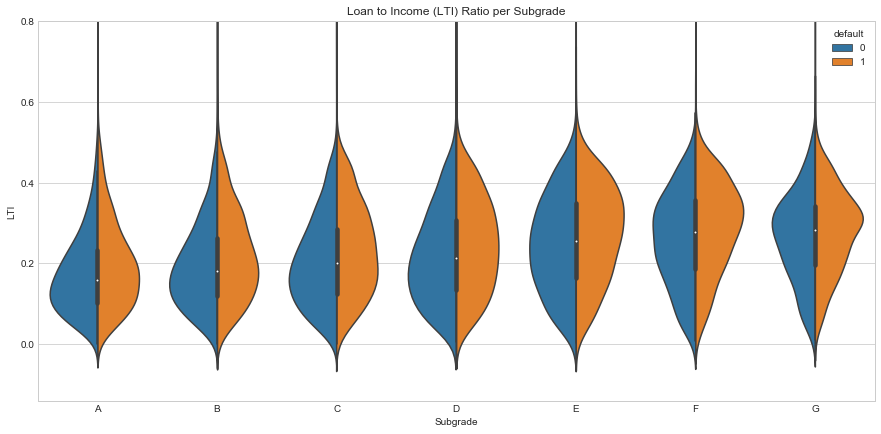

In [61]:
plt.figure(figsize=(15,7))

temp_data = data[~data['loan_status'].str.contains('Late')].copy()

grades = list('ABCDEFG')
grades_mapping = {grade: i for i, grade in enumerate(grades)}
grades_key = temp_data['grade'].map(grades_mapping)
temp_data = temp_data.iloc[grades_key.argsort()]

# Loan to Income ratio
lti = temp_data['loan_amnt'] / temp_data['annual_inc_merged']

ax = sns.violinplot(temp_data['grade'], lti, hue=temp_data['default'], split=True, bw=0.3)

plt.ylim(top=0.8)
plt.title('Loan to Income (LTI) Ratio per Subgrade')
plt.xlabel('Subgrade')
plt.ylabel('LTI')

plt.show()

In [63]:
temp_data['lti'] = lti
temp_data.groupby(['grade', 'default'])['lti'].describe()

count      mean       std       min       25%       50%  \
grade default                                                              
A     0        39759.0  0.173790  0.096266  0.000746  0.100000  0.157895   
      1         2671.0  0.198157  0.105966  0.013333  0.116667  0.184393   
B     0        66806.0  0.192917  0.101293  0.002076  0.116505  0.178448   
      1         9801.0  0.221955  0.110877  0.004611  0.136364  0.208333   
C     0        53153.0  0.204791  0.107884  0.000833  0.120755  0.190984   
      1        13150.0  0.236517  0.113492  0.000919  0.146969  0.229167   
D     0        30514.0  0.215539  0.113164  0.005217  0.125843  0.202532   
      1        10994.0  0.246876  0.115808  0.009709  0.153846  0.244244   
E     0        13305.0  0.245564  0.117321  0.004032  0.154492  0.243056   
      1         6617.0  0.274778  0.116699  0.005208  0.184783  0.282000   
F     0         4880.0  0.257428  0.115249  0.008571  0.173611  0.261536   
      1         3106.0  0.289898  0.111537  0.019034  0.210893  0.299490   
G     0         1268.0  0.263353  0.110521  0.011765  0.187588  0.272526   
      1          886.0  0.281004  0.102081  0.021361  0.208773  0.296699   

                    75%       max  
grade default                      
A     0        0.230405  0.777083  
      1        0.262216  0.589623  
B     0        0.255319  0.830000  
      1        0.300000  0.819672  
C     0        0.276923  0.777778  
      1        0.320513  1.120000  
D     0        0.295652  1.337500  
      1        0.336451  0.758333  
E     0        0.335714  0.800000  
      1        0.360825  0.666667  
F     0        0.342857  0.773810  
      1        0.371076  0.704310  
G     0        0.339000  0.949367  
      1        0.352941  0.603448

LTI seems to show a more significant increase in mean value with decreasing grade versus the original DTI feature, along with its percentile values. It is worth noting, however, that the maximum LTI for each category is quite sporadic, so there may be a number of outliers generated via this new ratio due to unusual income - loan amount combinations. 

Another approach would be to use the total revolving limit as a reference instead of annual income. Unfortunately with the absence of the total installment limit (had to be removed due to missing data), there is no way of capturing the full scope of a borrowers credit limit, but perhaps the revolving limit alone can still provide some information:

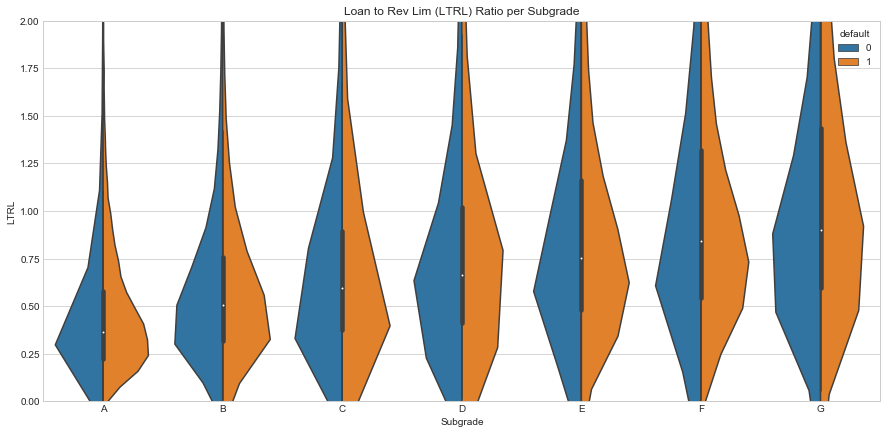

In [66]:
plt.figure(figsize=(15,7))

temp_data = data[(~data['loan_status'].str.contains('Late')) & (data['total_rev_hi_lim'] > 0)].copy()

grades = list('ABCDEFG')
grades_mapping = {grade: i for i, grade in enumerate(grades)}
grades_key = temp_data['grade'].map(grades_mapping)
temp_data = temp_data.iloc[grades_key.argsort()]

# Loan to Income ratio
ltrl = temp_data['loan_amnt'] / temp_data['total_rev_hi_lim']

ax = sns.violinplot(temp_data['grade'], ltrl, hue=temp_data['default'], split=True, bw=.1)

plt.ylim(0,2)
plt.title('Loan to Rev Lim (LTRL) Ratio per Subgrade')
plt.xlabel('Subgrade')
plt.ylabel('LTRL')

plt.show()

In [68]:
temp_data['ltrl'] = ltrl
temp_data.groupby(['grade', 'default'])['ltrl'].describe()

count      mean       std       min       25%       50%  \
grade default                                                              
A     0        24230.0  0.467932  0.569281  0.004135  0.223340  0.363409   
      1         1566.0  0.530428  0.529672  0.015352  0.250262  0.405554   
B     0        48819.0  0.614818  0.567714  0.005822  0.316901  0.503597   
      1         7011.0  0.664555  0.770432  0.015408  0.331046  0.519097   
C     0        42021.0  0.734006  0.753791  0.006470  0.372024  0.590551   
      1        10572.0  0.803629  1.082750  0.016086  0.400805  0.617284   
D     0        23796.0  0.841321  0.975617  0.013699  0.403711  0.653437   
      1         8852.0  0.917577  1.197131  0.012475  0.443148  0.698786   
E     0        10330.0  0.974089  1.145769  0.011905  0.471976  0.743644   
      1         5277.0  1.033347  1.188078  0.020163  0.490196  0.764192   
F     0         3869.0  1.124996  1.570105  0.013945  0.526549  0.827586   
      1         2479.0  1.174617  1.306605  0.022876  0.577862  0.870466   
G     0          900.0  1.209557  2.059906  0.056316  0.570170  0.863046   
      1          655.0  1.489461  2.404654  0.074919  0.635841  0.958889   

                    75%        max  
grade default                       
A     0        0.574713  40.000000  
      1        0.647966   8.000000  
B     0        0.754727  20.000000  
      1        0.790829  22.666667  
C     0        0.888889  46.666667  
      1        0.925926  58.666667  
D     0        1.000000  40.000000  
      1        1.063830  50.000000  
E     0        1.155545  38.888889  
      1        1.173077  27.272727  
F     0        1.318681  44.285714  
      1        1.320367  23.500000  
G     0        1.333969  40.000000  
      1        1.564338  42.857143

This loan amount to total revevoling limit ratio (LTRL) actually shows the most drastic increase in mean versus decreasing grade, and some of the more significant value differences between default and non-default. Also worth noting is the significant increase in standard deviation for the lower grades, whereas our other two ratios had relatively constant standard deviations across grade levels. This large spread may tie back to the issue of not having the 'complete' credit limit to compare to, so whilst we do observe more significant shifts and correlations with this ratio it may prove to be misleading for modeling purposes.

### Evaluating DTI and Utilization

Having already compared DTI and similar ratios to loan grades, we will take a look at DTI on its own and how it compares for default vs. non-defaulted loans:

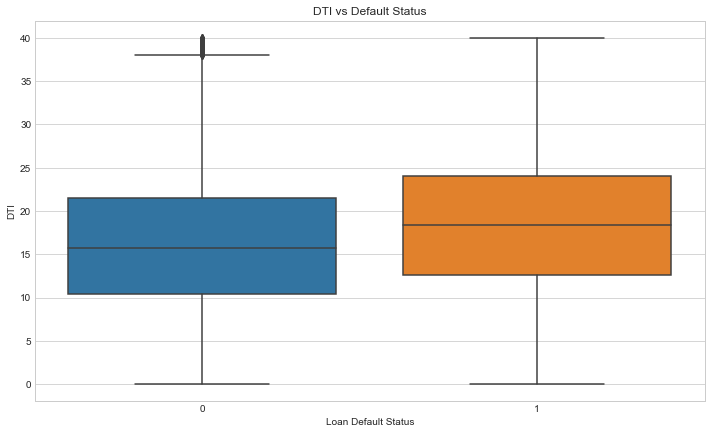

In [71]:
plt.figure(figsize=(12,7))

temp_data = data[~data['loan_status'].str.contains('Late')]

ax = sns.boxplot(temp_data['default'],temp_data['dti_merged'], showfliers=True)

plt.title('DTI vs Default Status')
plt.xlabel('Loan Default Status')
plt.ylabel('DTI')

plt.show()

In [72]:
temp_data.groupby('default')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,209685.0,16.120947,7.695655,0.0,10.40,15.74,21.46,57.14
1,47225.0,18.378769,7.955452,0.0,12.56,18.33,24.07,39.98


Whilst there is an increase in mean/median DTI for defaulted loans, we see that both default and non-default loans share a very similar spread and range of DTI. Thus, it is unlikely that DTI alone will provide a strong indication of default likelihood. Also worth noting is that the majority of data seems to be capped at a DTI of approx. 40.

Splitting this visualization furhter into income quartiles yields the following:

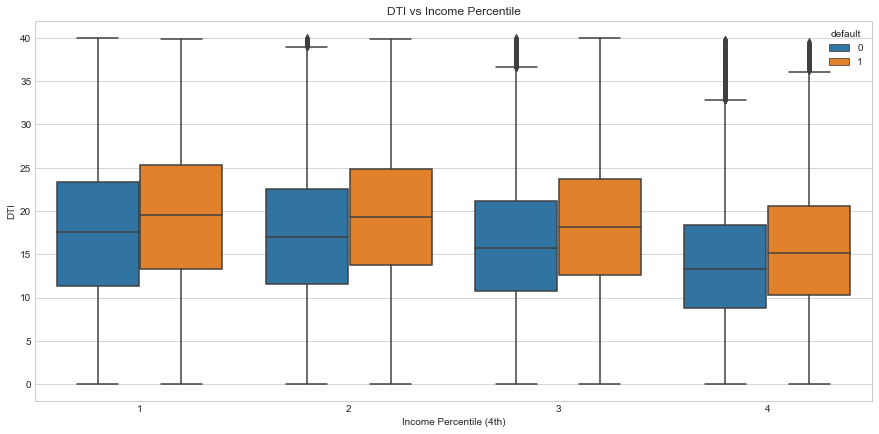

In [39]:
plt.figure(figsize=(15,7))

temp_data = data[~data['loan_status'].str.contains('Late')]

q = 0.25
q_range = np.arange(q, 1+q, q)
quantiles = temp_data['annual_inc_merged'].quantile(q_range)
income_q4 = temp_data['annual_inc_merged'].apply(lambda x: get_qbin(x, quantiles))

ax = sns.boxplot(income_q4, temp_data['dti_merged'], hue=temp_data['default'])

plt.title('DTI vs Income Percentile')
plt.xlabel('Income Percentile (4th)')
plt.ylabel('DTI')

plt.show()

There is a gradual downard trend in median DTI with increasing income, but we still have the same range in DTI across all categories.

Taking a look at correlations across all numerical features, we will see what relationships may be worth investigating further.

In [40]:
data.corr()['dti'].sort_values(ascending=False)

dti                        1.000000
dti_merged                 0.999944
open_acc                   0.309754
total_acc                  0.232231
revol_util                 0.218718
int_rate                   0.177299
revol_bal                  0.145639
default_harsh              0.136297
default                    0.098160
out_prncp                  0.083186
out_prncp_inv              0.083176
funded_amnt_inv            0.062732
total_rev_hi_lim           0.061554
funded_amnt                0.056772
total_rec_int              0.056353
loan_amnt                  0.054876
installment                0.054361
recoveries                 0.042857
collection_recovery_fee    0.034800
acc_now_delinq             0.010370
last_pymnt_amnt            0.005389
had_collections            0.004693
had_major_derog            0.001650
total_rec_late_fee         0.001101
delinq_2yrs                0.000172
rev_lim_custom            -0.001196
rev_util_custom           -0.001196
tot_coll_amt              -0

Based off the correlation above, the most noteworthy features (ignoring directly related columns) are: open_acc, total_acc, revol_util, int_rate, revol_bal, annual_inc, and total_cur_bal_med.

In [106]:
def jointplot_filtered(data, x, y, p_high = .95, p_low = .05, title=''):
    var = 'open_acc'
    # Ignore data outside defined percentiles
    x_high = data[x].quantile(p_high)
    x_low = data[x].quantile(p_low)
    y_high = data[y].quantile(p_high)
    y_low = data[y].quantile(p_low)

    mask = (data[x] <= x_high) & (data[x] >= x_low) & (data[y] <= y_high) & (data[y] >= y_low)

    sns.jointplot(data[mask][x], data[mask][y], kind='hex',gridsize=15)
    plt.suptitle(title)
    
    plt.show()

One would anticipate some correlation between the number of open accounts and DTI, since more accounts enables more debt:

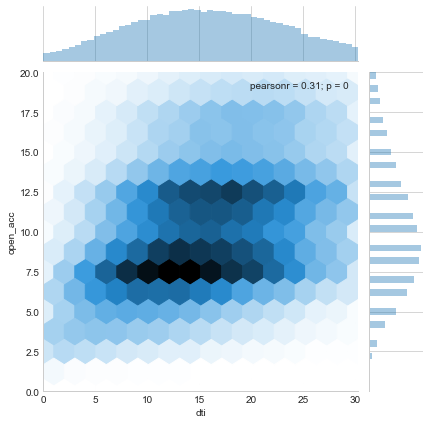

In [108]:
jointplot_filtered(data, 'dti', 'open_acc', p_low=0)

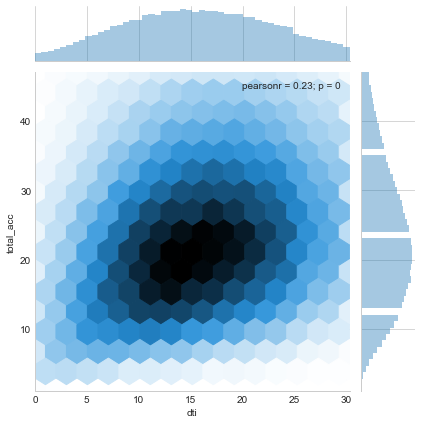

In [110]:
jointplot_filtered(data, 'dti', 'total_acc', p_low=0)

There still is a spread of DTI across each interval of open/total accounts, but the rough positive correlation is still visibile.

With the correlation between interest rate, grade, income, etc. already esablished, it is of little surprise that interest rate and DTI have somewhat of a correlation through association. However it is clearly not the deciding factor for a given loans interest rate, as seen by the spread of DTI across the various rates:

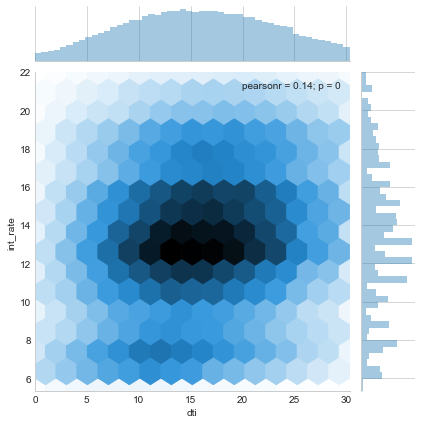

In [44]:
jointplot_filtered(data, 'dti', 'int_rate', p_low=0)

As for DTI and revolving balance/utilization, whilst one would expect a strong correlaton between the two since more debt (higher debt) requires a higher utilization and balance, it becomes clear that dont have pull picture of utilization due to missing installmenet debt data. 

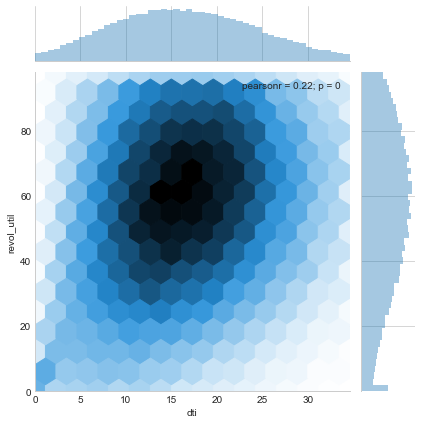

In [46]:
jointplot_filtered(data, 'dti', 'revol_util', p_low=0, p_high=.99)

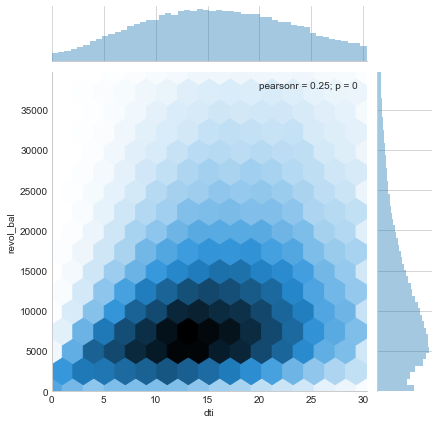

In [47]:
jointplot_filtered(data, 'dti', 'revol_bal', p_low=0)

### Evaluating Interest Rate

In [49]:
data.corr()['int_rate'].sort_values(ascending=False)

int_rate                   1.000000
total_rec_int              0.405727
revol_util                 0.333140
default_harsh              0.256293
funded_amnt_inv            0.219231
default                    0.219082
funded_amnt                0.216757
loan_amnt                  0.215065
installment                0.205447
inq_last_6mths             0.201540
dti                        0.177299
dti_merged                 0.177284
recoveries                 0.164726
had_delinq                 0.144007
out_prncp                  0.130412
out_prncp_inv              0.130408
had_major_derog            0.123598
collection_recovery_fee    0.107714
total_pymnt_inv            0.106219
total_pymnt                0.103222
last_pymnt_amnt            0.094608
delinq_2yrs                0.091294
had_record                 0.084631
pub_rec                    0.081777
earliest_cr_line_td        0.066743
total_rec_late_fee         0.063478
open_acc                   0.041748
had_collections            0

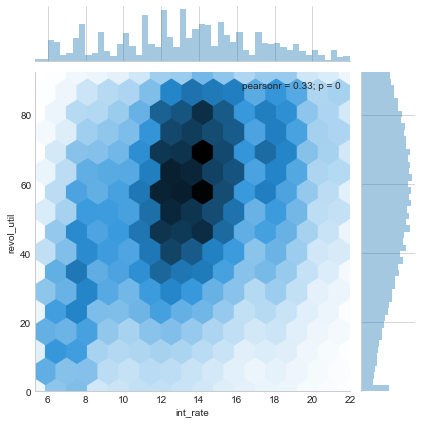

In [89]:
jointplot_filtered(data, 'int_rate', 'revol_util', p_low=0)

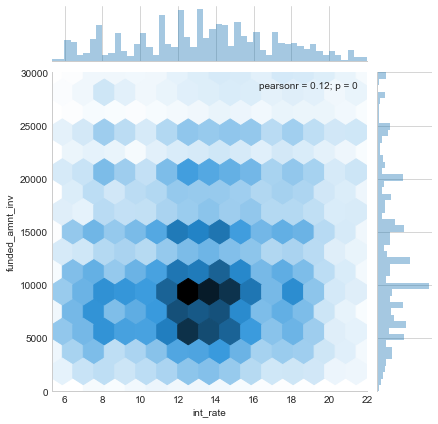

In [50]:
jointplot_filtered(data, 'int_rate', 'funded_amnt_inv', p_low=0)

Both the interest rate and installement amount are provided. We will see if the installement amount is actually derived from the interest rate & loan term or perhaps calculated through some other method:

In [51]:
data[['funded_amnt_inv', 'out_prncp_inv', 'term', 'int_rate', 'installment']].head()

,funded_amnt_inv,out_prncp_inv,term,int_rate,installment
id,,,,,
1077501,4975.0,0.0,36 months,10.65,162.87
1077430,2500.0,0.0,60 months,15.27,59.83
1077175,2400.0,0.0,36 months,15.96,84.33
1076863,10000.0,0.0,36 months,13.49,339.31
1075269,5000.0,0.0,36 months,7.90,156.46


In [83]:
# monthly installement = p (r(1+r)^n)/((1+r)^n-1)

# Monthly interest rate
r = data['int_rate'] / 100 / 12

# Number of installments
n = data['term'].apply(lambda x: int(x[:3]))

In [86]:
# Calculate installment using loan_amnt

# Principal amount
p = data['loan_amnt']

# Installement calculation
inst_custom = p * (r*(1+r)**n)/((1+r)**n -1)

# Mean % difference from actual value
(abs(data['installment'] - inst_custom) / data['installment']).mean()

0.0038145935662404306

In [87]:
# Calculate installment using loan_amnt

# Principal amount
p = data['funded_amnt']

# Installement calculation
inst_custom = p * (r*(1+r)**n)/((1+r)**n -1)

# Mean % difference from actual value
(abs(data['installment'] - inst_custom) / data['installment']).mean()

4.782753787754995e-05

In [88]:
# Calculate installment using loan_amnt

# Principal amount
p = data['funded_amnt_inv']

# Installement calculation
inst_custom = p * (r*(1+r)**n)/((1+r)**n -1)

# Mean % difference from actual value
(abs(data['installment'] - inst_custom) / data['installment']).mean()

0.010662222430056437

It would appear that the funded_amnt is used to calculate the installment amount for a loan. Thus, in terms of eliminating redundant features it may best to discard 'loan_amnt'. As for 'funded_amnt_inv', however, we will need to see how the two funded_amnt features compare to the other payment values, since ultimately we are most concerned with the amounts which pertain to the Lending Club investor, and not previous transactions.

### Evaluating Borrower Info

In [ ]:
### Home ownership

In [ ]:
### Credit history, delinquencies

In [ ]:
### Income verif

In [ ]:
### emp length

### Evaluating Loan Info

In [ ]:
### purpose

In [ ]:
### term

In [ ]:
### app type

### Evaluating Payments

In [ ]:
# last payment

In [ ]:
# totals etc

In [251]:
# installment

### Evaluating Credit History

In [103]:
# values versus months, years. See if data expires